# Census Income Modeling

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pipeline_utilities as p_util
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
#from sklearn.ensemble import RandomForestClassifier


In [32]:
# Import and examine the data
original_data = pd.read_csv("../Project2_Resources/census-income-test.csv")
original_data.head()

,Age,Class,Industry,Occupation,Education,Wage per hour,Education last week,Marital,Major Industry,Major Occupation,...,FatherCountry,MotherCountry,BirthCountry,Citizenship,Self employed,VetQtnaire,Veteran,Weeks Worked,Year,Above50K
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


In [34]:
# Review the columns
original_data.columns

Index(['Age', 'Class', 'Industry', 'Occupation', 'Education', 'Wage per hour',
       'Education last week', 'Marital', 'Major Industry', 'Major Occupation',
       'Race', 'Hispanic', 'Gender', 'Labor union', 'Unemployment Reason',
       'Employment Status', 'Capital Gains', 'Capital Loss', 'Dividends',
       'TaxFiler', 'Previous Region', 'Previous State', 'Family Status',
       'Household', 'Instance Weight', 'MIGMSA', 'MIGRegion', 'MIGMove',
       '1YearAgo', 'PrevSunBelt', 'Under18', 'Parents', 'FatherCountry',
       'MotherCountry', 'BirthCountry', 'Citizenship', 'Self employed',
       'VetQtnaire', 'Veteran', 'Weeks Worked', 'Year', 'Above50K'],
      dtype='object')

In [35]:
# Review the values
#original_data.describe()

In [36]:
# Define a function
def set_target(above50k):
    if above50k == '-50000':
        return 0
    return 1

# "Apply" the function to the amount column
original_data['KTarget'] = original_data['Above50K'].apply(set_target)
original_data['KTarget'].value_counts()

KTarget
0    93576
1     6186
Name: count, dtype: int64

In [38]:
columns_to_encode = ['Class', 'Education', 'Education last week', 'Marital',
                     'Major Industry', 'Major Occupation', 'Race', 'Employment Status',
                     'Hispanic', 'Gender', 'Labor union', 'Unemployment Reason', 
                     'TaxFiler', 'Previous Region', 'Previous State', 'Family Status', 
                     'Household', 'MIGMSA', 'MIGRegion', 'MIGMove',
                     '1YearAgo', 'PrevSunBelt', 'Parents', 'FatherCountry', 'MotherCountry', 
                     'BirthCountry', 'Citizenship', 'Self employed', 
                     'VetQtnaire', 'Veteran' 
                    ]

# Make a copy of the dataset
data_copy = original_data.copy()

# Loop through columns_to_encode and convert the columns to category codes
for column in columns_to_encode:
    data_copy[column] = data_copy[column].astype("category").cat.codes

data_copy.head()

,Age,Class,Industry,Occupation,Education,Wage per hour,Education last week,Marital,Major Industry,Major Occupation,...,MotherCountry,BirthCountry,Citizenship,Self employed,VetQtnaire,Veteran,Weeks Worked,Year,Above50K,KTarget
0,38,4,6,36,3,0,2,2,10,5,...,26,26,0,0,1,2,12,95,-50000,0
1,44,6,37,12,8,0,2,2,2,10,...,40,40,4,0,1,2,26,95,-50000,0
2,2,3,0,0,10,0,2,4,14,6,...,40,40,4,0,1,0,0,95,-50000,0
3,35,4,29,3,12,0,2,0,21,2,...,40,40,4,2,1,2,52,94,-50000,0
4,49,4,4,34,12,0,2,0,4,8,...,40,40,4,0,1,2,50,95,-50000,0


In [39]:
data_copy = data_copy.drop(columns='Above50K')

In [40]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  99762 non-null  int64  
 1   Class                99762 non-null  int8   
 2   Industry             99762 non-null  int64  
 3   Occupation           99762 non-null  int64  
 4   Education            99762 non-null  int8   
 5   Wage per hour        99762 non-null  int64  
 6   Education last week  99762 non-null  int8   
 7   Marital              99762 non-null  int8   
 8   Major Industry       99762 non-null  int8   
 9   Major Occupation     99762 non-null  int8   
 10  Race                 99762 non-null  int8   
 11  Hispanic             99762 non-null  int8   
 12  Gender               99762 non-null  int8   
 13  Labor union          99762 non-null  int8   
 14  Unemployment Reason  99762 non-null  int8   
 15  Employment Status    99762 non-null 

## Split the Data into Training and Testing Sets

In [41]:
# Create the labels set `y` and features DataFrame `X`
y = data_copy['KTarget']

X = data_copy.copy()
X = X.drop(columns='KTarget')

In [42]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

KTarget
0    93576
1     6186
Name: count, dtype: int64

In [43]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [44]:
# Transforming the test dataset based on the fit from the training dataset
X_train_scaled, X_test_scaled = p_util.scale_data_with_StandardScaler(X_train, X_test)

Scaled X_train data: [[-1.55128832 -0.44578105 -0.85145338 ... -1.79301137 -0.95187024
   1.00060162]
 [-0.92375149 -0.44578105 -0.85145338 ... -1.79301137 -0.95187024
  -0.99939875]
 [ 0.37614623  0.45804205  1.42185532 ...  0.56573543  1.17905063
   1.00060162]
 ...
 [-0.69963119 -0.44578105 -0.85145338 ...  0.56573543 -0.95187024
   1.00060162]
 [ 0.06237782 -0.44578105 -0.85145338 ...  0.56573543 -0.13228529
  -0.99939875]
 [ 1.09333118 -2.25342726  1.53274843 ...  0.56573543  1.17905063
  -0.99939875]]
Scaled X_train data: [[-1.14787178 -0.44578105 -0.85145338 ... -1.79301137 -0.95187024
   1.00060162]
 [-0.16174248  0.45804205 -0.13064818 ...  0.56573543  1.17905063
  -0.99939875]
 [-0.0272703  -0.44578105 -0.85145338 ...  0.56573543  1.17905063
  -0.99939875]
 ...
 [ 0.01755376  0.45804205  1.089176   ...  0.56573543  1.17905063
   1.00060162]
 [-1.55128832 -0.44578105 -0.85145338 ... -1.79301137 -0.95187024
  -0.99939875]
 [-0.34103872  0.45804205  1.089176   ...  0.56573543  1

## Create and Fit a PCA Model

Try a PCA model. 

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(X_train_scaled)
X_data_pca[:5]
pca.explained_variance_ratio_
pca_df = pd.DataFrame(
    X_data_pca,
    columns=["PCA1", "PCA2"]
)

In [46]:
X_data_pca[:5]

array([[-1.39500203, -4.0443391 ],
       [-4.18996392, -0.49816382],
       [ 3.37770272,  0.12144896],
       [-2.72790293,  0.89823084],
       [-2.97630498,  0.68047628]])

In [47]:
pca.explained_variance_ratio_

array([0.14124946, 0.13273427])

In [48]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

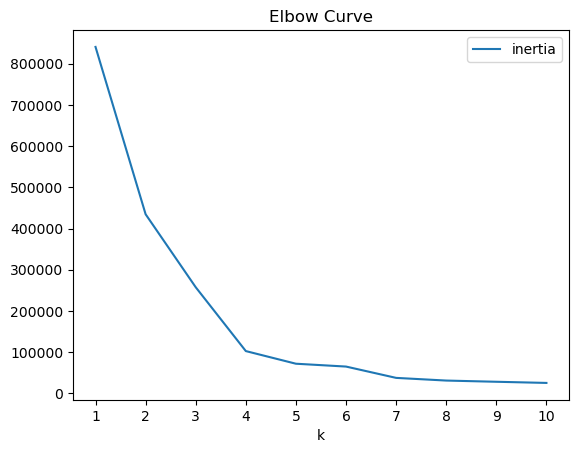

In [49]:
# Review the DataFrame
df_elbow.head()
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [50]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 48.29%
Percentage decrease from k=2 to k=3: 40.72%
Percentage decrease from k=3 to k=4: 60.10%
Percentage decrease from k=4 to k=5: 29.83%
Percentage decrease from k=5 to k=6: 9.55%
Percentage decrease from k=6 to k=7: 42.09%
Percentage decrease from k=7 to k=8: 17.18%
Percentage decrease from k=8 to k=9: 9.35%
Percentage decrease from k=9 to k=10: 9.87%


In [52]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

# Fit the model
model.fit(pca_df)

# Make predictions
k_3 = model.predict(pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

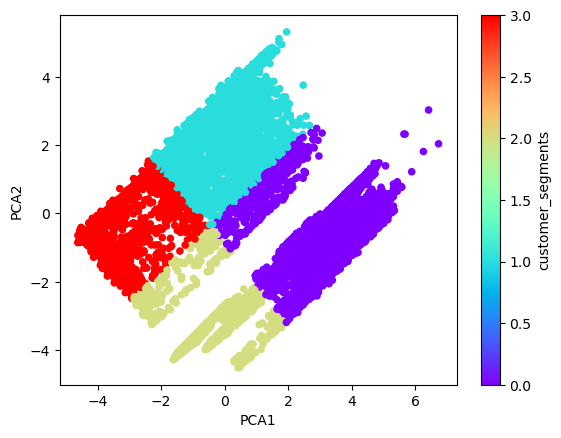

In [53]:
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='rainbow')

In [56]:
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X_train.columns)
pca_component_weights.sort_values('PCA1', ascending=False)

,PCA1,PCA2
Year,0.273900,-0.311227
Parents,0.258270,0.237206
Veteran,0.255113,0.228844
Employment Status,0.251299,-0.131818
Weeks Worked,0.238491,0.223628
Industry,0.212806,0.199314
Family Status,0.211119,0.203823
Under18,0.207601,0.180971
Household,0.192204,0.188637
Occupation,0.189075,0.173790


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [57]:
# All requirements above have been coded into pipeline_utilities python program file

random_state = 1
p_util.logistic_regression_model_generator(X_train_scaled, X_test_scaled, y_train, y_test, random_state)


Logistic Regression Training Data Score: 0.9480226139720132
Logistic Regression Testing Data Score: 0.9474359488392606
Logistic Regression Predictions Accuracy Score: 0.9474359488392606
              precision    recall  f1-score   support

           1       0.68      0.27      0.39      1535
           0       0.95      0.99      0.97     23406

    accuracy                           0.95     24941
   macro avg       0.82      0.63      0.68     24941
weighted avg       0.94      0.95      0.94     24941

Logistic Regression Balanced Accuracy Score: 0.6310990027056733
Logistic Regression roc_auc_score: 0.9307788803105471


C:\Users\kalas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [58]:
# All details have been coded into pipeline_utilities python program file

random_state = 1
n_estimators = 100
p_util.random_forest_model_generator(X_train_scaled, X_test_scaled, y_train, y_test, random_state, n_estimators, X.columns)


Random Forest Training Data Score: 1.0
Random Forest Testing Data Score: 0.9546529810352432
Random Forest Predictions Accuracy Score: 0.9546529810352432
              precision    recall  f1-score   support

           1       0.75      0.40      0.52      1535
           0       0.96      0.99      0.98     23406

    accuracy                           0.95     24941
   macro avg       0.86      0.69      0.75     24941
weighted avg       0.95      0.95      0.95     24941

Random Forest Balanced Accuracy Score: 0.6933833747910069
[(0.09274700315864301, 'Age'), (0.09185245758984628, 'Occupation'), (0.09163373693036583, 'Dividends'), (0.08867168234569518, 'Instance Weight'), (0.08508510105761018, 'Capital Gains'), (0.05384364512376472, 'Industry'), (0.04881015643161835, 'Education'), (0.04061983546863326, 'Weeks Worked'), (0.040364512400447625, 'Under18'), (0.03917490075139727, 'Major Industry')]


## Create and Fit an SVM Model

Create a Support Vector Machine model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. 

In [ ]:
# All details have been coded into pipeline_utilities python program file, takes FOREVER to run

#kernel_type = 'linear'
#p_util.svm_model_generator(X_train_scaled, X_test_scaled, y_train, y_test, kernel_type)


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

* Both models had over 90% accuracy score, indicating that both models performed reasonably well, but the Random Forest model performed better than the Logistic Regression model by 2 percentage points. The Random Forest model achieved an accuracy of 95.22% with testing data and predictions while the Logistic Regression model achieved a score of 93.22%.
* My prediction that Logistic Regression model would perform better was incorrect!